# DATA SCIENCE INTERNSHIP TASK 3

NAME - NAGA VENKATA LAKSHMI CHEEPULLA 
Customer Segmentation Analysis with Python

Using data set on mall customers to try to see if there are any discernible segments and patterns.

Customer segmentation is useful in understanding what demographic and psychographic

sub-populations there are within your customers in a business case.

By understanding this, we can better understand how to market and serve them.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data set
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


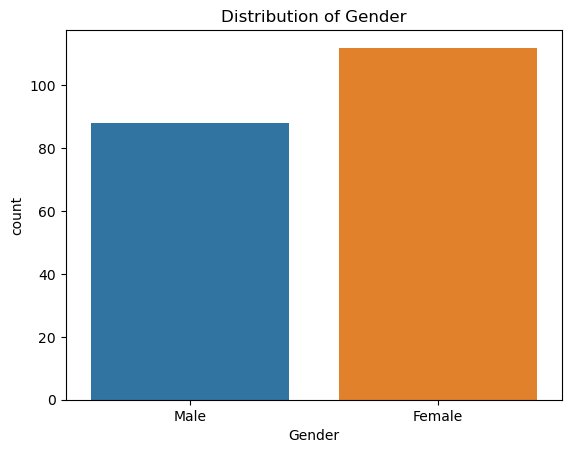

In [10]:
#it's always informative to see how categorical variables are split up throughout the data set.This can be done with a simple count plot.
#See the distribution of gender to recognize different distributions

sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender');

There are slightly more women than men in this data set.
They will perhaps be a significant element in our customer segmentation efforts later.

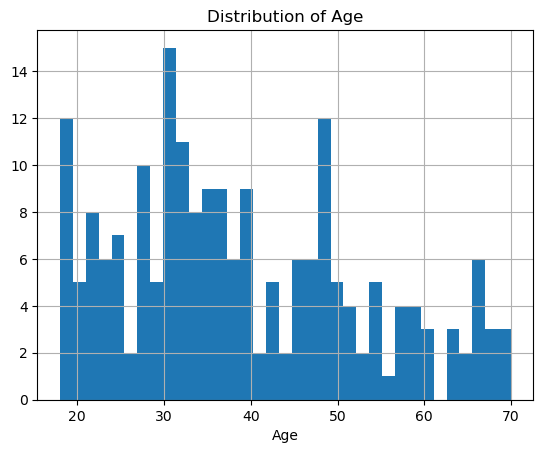

In [11]:
# Let's see Age 

# Create a histogram of ages
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

From above graph we can say that 

1) The ages are mostly between 30 and 40

2) Recalling the describe() call results this makes sense. 

3) The average age was 38. 

4) There are less older customers so this distribution is right-skewed because of its longer right tail.

5) This could be because of the appeal of malls and the type of demographic that tends to shop there.

we can add detail to this by overlaying two histograms, creating one age histogram for each gender.

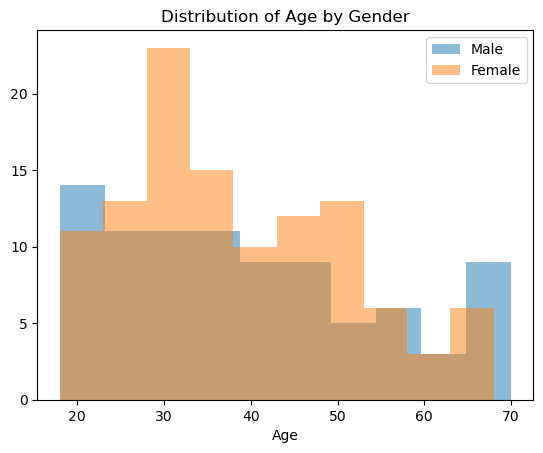

In [12]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

The men looks  younger than the women. 

we can see the spike around the age of 30–35 for the women is where the majority of them fall. 

There are also more middle-aged women in this data set than men. 

There is a significant amount of senior men in the 65–70 year.

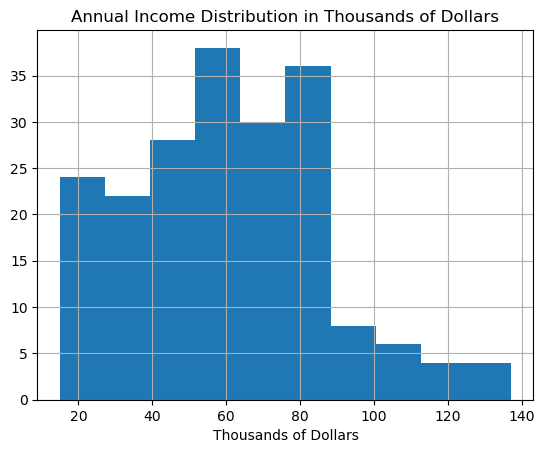

In [13]:
# Lets check about income
df.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

we can see that the incomes lie between the 60 and 85,000 dollar.

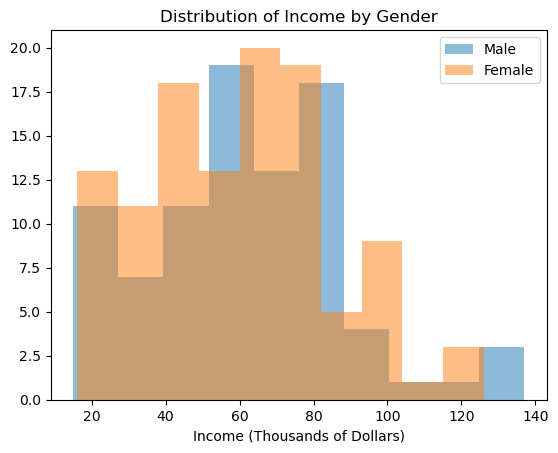

In [14]:
# Now check gender impact this or not
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

The women in this data set make less money than the men.

In [15]:
# Let's check their spending scores

# Creating data sets by gender to save time in the future since gender seems to significantly impact other variables

male_customers = df[df['Gender'] == 'Male']
female_customers =df[df['Gender'] == 'Female']


# Printing the average spending score for men and women

print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())




48.51136363636363
51.526785714285715


we can see that Men had an average spending score of 48.5 and women had an average score of 51.5.

Women earned less but spent more at this mall and in this data set.

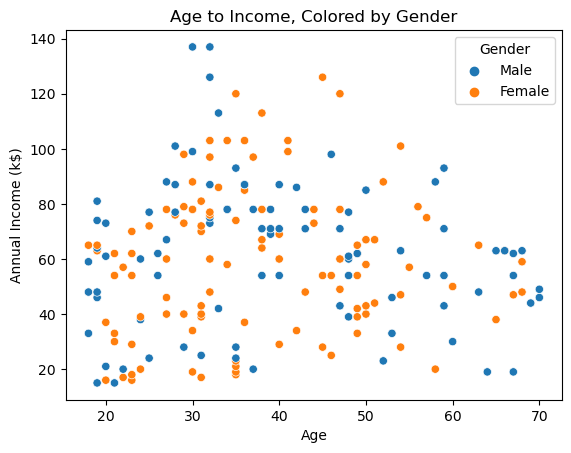

In [16]:
# # Let's plot scatterplot now 

# scatter plot is used in the given code to visualize the relationship between two numerical variables
#'Age' and 'Annual Income (k$)', and how this relationship is affected by the categorical variable 'Gender'.


sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df)
plt.title('Age to Income, Colored by Gender')
plt.show()


There is no clear correlation.

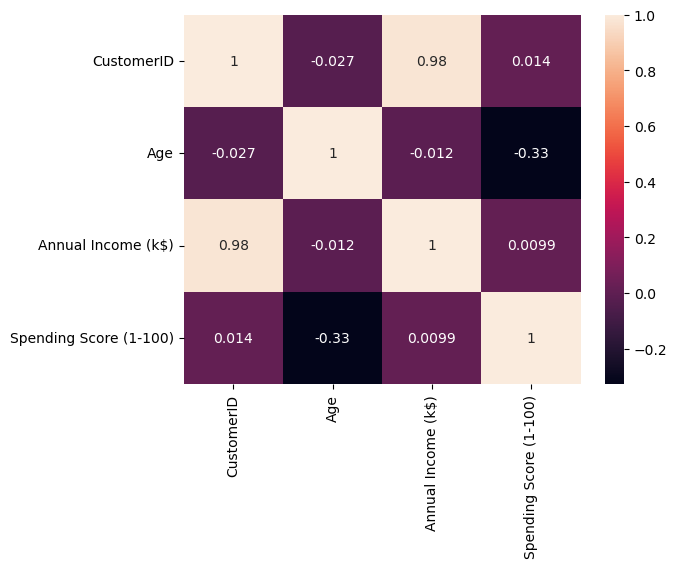

In [17]:
#  Heatmap - to create a heatmap of the correlation matrix for the customers
sns.heatmap(df.corr(), annot=True)
plt.show()

We can see from the above plot that the only variables that are even somewhat correlated is spending score and age. 

It’s a negative correlation so the older a customer is in this data set, the lower their spending score.

But because it’s 0.33, it’s not a strong correlation at all. 

It’s still ever so slightly informative and follows basic logic.

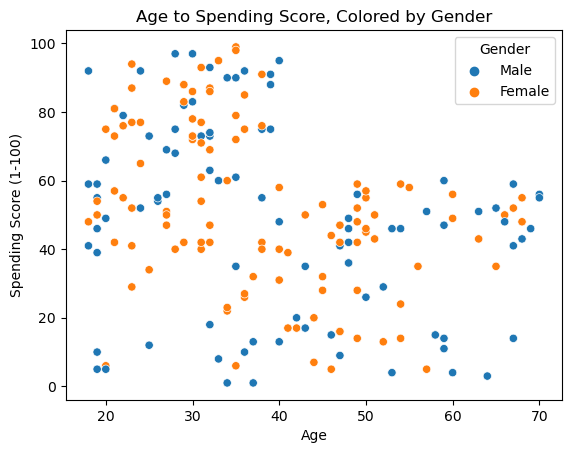

In [18]:
# Checking trend 

sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age to Spending Score, Colored by Gender')
plt.show()

See that slight negative correlation.


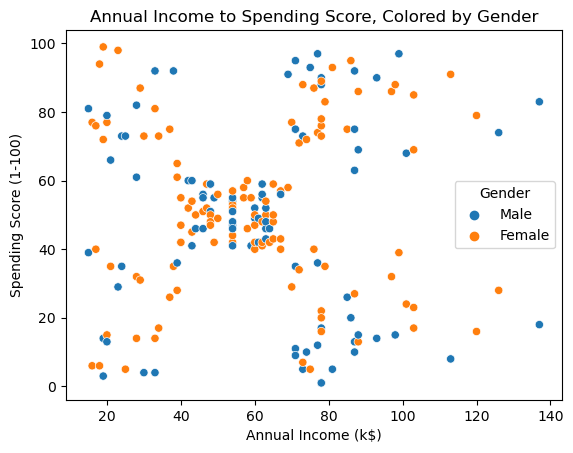

In [19]:
# looking  at income to spending score colored by gender

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income to Spending Score, Colored by Gender')
plt.show()

There is some patterning here. 

Zero correlation though we can think of these as customer segments:

Low income, low spending score
Low income, high spending score
Mid income, medium spending score
High income, low spending score
High income, high spending score

# Interpretation and Actions

Bringing it back to the business and marketing use cases of this kind of analysis


The following hypotheses Sould be tested.

Does marketing cheaper items to women change purchase frequency or volume?

Does marketing more to younger women result in higher sales because their spending score tends to be higher?

How do advertising, pricing, branding, and other strategies impact the spending scores of the older women (older than early 40s)?

# KPIs


I am defining  the following KPIs as an example to show how we would know if our efforts are paying off or not.

The change in frequency and volume of purchases by women after the introduction of more marketing campaigns targeting them.

The change in spending score after introducing marketing campaigns targeting younger women.

The change in spending score after introducing marketing campaigns targeting older women.
